## Display regrets on multiple expes for LinUCB, PPO

In [32]:
from bandits.policy_linucb_kfoofw import LinUCBPolicy_kfoofw
from bandits.agent import VSAgent, SB3VSAgent, AgentsLoaderLoop

policy = LinUCBPolicy_kfoofw((-1, 1))
agent = VSAgent(policy)

loop_loader = AgentsLoaderLoop(agent)

#Best:  filever="99kfoo1_"
optfiles, optdicts, best_agent = loop_loader.load(1, filever="99kfoo1_", performance_field="test_reg_perf", verbose=1)

#if best_agent:
#    best_agent.showLearnFig(head_title="", renderer=None)

# OPTDICT is: expe=expe, train_alpha=ALPHA, train_regret=train_regret, train_reg_perf=env_train._reg_performance, test_regret=test_regret, test_reg_perf=env_test.getBestPerformance()
#
test_regret_linucb_exp = [] #np.empty((len(optdicts), len(test_regret[0])))

for od in optdicts:
    print(f'L{od["expe"]} Alpha:{od["train_alpha"]} TrainRegPerf:{od["train_reg_perf"]} TestRegPerf:{od["test_reg_perf"]} #TestReg:{len(od["test_regret"])}')
    test_regret_linucb_exp.append(od["test_regret"])



Load agent-99kfoo1_0-LinUCB_kfoofw(-1, 1)D.pickle...
agent-99kfoo1_0-LinUCB_kfoofw(-1, 1)D.pickle is loaded.
Loaded optdict: {'min_max_scaler': None, 'expe': 0, 'train_alpha': 0.7, 'train_regret': array([  0.        ,   1.62178921,   2.24191791, ..., 501.49854201,
       501.49854201, 501.49854201]), 'train_reg_perf': 501.499, 'train_reg_results': array([0.66734661, 0.47580431, 0.38675133, 0.50227152, 0.26241122,
       0.23775811, 0.28120854, 0.46823286, 0.39788219, 0.16421606,
       0.14414287, 0.08762814, 0.09311293, 0.07999964, 0.08280772,
       0.03079032, 0.00959232, 0.07157416, 0.04314264, 0.00685842,
       0.03777701, 0.0245279 , 0.01873923, 0.04002509, 0.02642997,
       0.02141019, 0.0564495 , 0.05573284, 0.03000757, 0.03615232,
       0.05285495, 0.        , 0.06947906, 0.01613587, 0.00835763,
       0.02654634, 0.014433  , 0.        , 0.0657251 , 0.06495211,
       0.07244031, 0.05257019, 0.01848912, 0.03415387, 0.0363996 ,
       0.04284183, 0.00904078, 0.        , 0.05

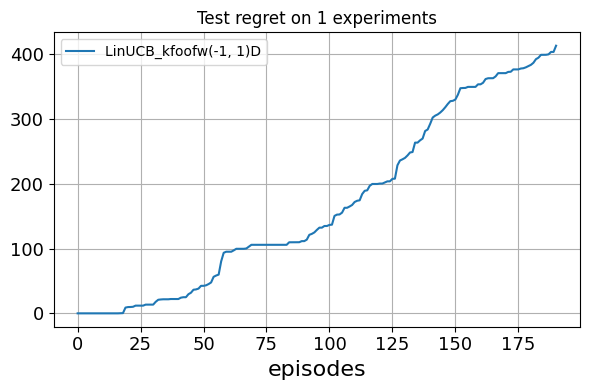

In [33]:
import numpy as np
import matplotlib.pyplot as plt

mean_test_regret_linucb_exp = np.mean(test_regret_linucb_exp, axis=0)

std_test_regret_linucb_exp = np.std(test_regret_linucb_exp, axis=0) / np.sqrt(len(test_regret_linucb_exp))

x = [i for i in range(len(mean_test_regret_linucb_exp))]
fig, ax = plt.subplots(figsize=(6, 4), nrows=1, ncols=1)
plt.xlabel('episodes',fontsize=16)
plt.xticks(fontsize=13,fontweight='normal')
plt.yticks(fontsize=13,fontweight='normal')
ax.plot(x,mean_test_regret_linucb_exp,label=best_agent.policy.name)
ax.fill_between(x,mean_test_regret_linucb_exp-1.96*std_test_regret_linucb_exp, mean_test_regret_linucb_exp+1.96*std_test_regret_linucb_exp,alpha=0.5)
plt.title(f"Test regret on {len(test_regret_linucb_exp)} experiments")
plt.legend(loc='best')
ax.grid()
plt.tight_layout()
plt.show()